In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

In [3]:
avg_scale_analyse = pd.read_csv('scale_analysis_results.csv', index_col=0).iloc[:3, :5].astype(float)
avg_scale_analyse

,33%,50%,66%,83%,100%
nnUNet 3D/160x128x32 (CLIP Pre-&Post-IVL),0.588442,0.644415,0.716145,0.654474,0.743980
nnUNet 3D/160x128x32 (LaW OCT),0.636594,0.680909,0.720197,0.682831,0.742475
nnUNet 3D/160x128x32,0.611389,0.553681,0.716012,0.644530,0.722741


In [4]:
std_scale_analyse = pd.read_csv('scale_analysis_results.csv', index_col=0).iloc[5:8, :5].astype(float)
std_scale_analyse

,33%,50%,66%,83%,100%
nnUNet 3D/160x128x32 (CLIP Pre-&Post-IVL),0.045574,0.038301,0.014678,0.022570,0.011089
nnUNet 3D/160x128x32 (LaW OCT),0.015173,0.052724,0.016676,0.029515,0.007909
nnUNet 3D/160x128x32,0.010205,0.147842,0.026313,0.028108,0.012554


In [5]:
avg_scale_analyse.iloc[0, :]

33%     0.588442
50%     0.644415
66%     0.716145
83%     0.654474
100%    0.743980
Name: nnUNet 3D/160x128x32 (CLIP Pre-&Post-IVL), dtype: float64

In [6]:
std_scale_analyse.iloc[0, :].to_numpy()

array([0.04557352, 0.03830128, 0.01467766, 0.02256959, 0.01108873])

In [7]:
cmap = mpl.colormaps['twilight_shifted']

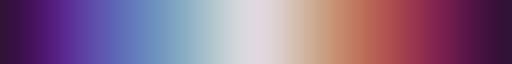

In [8]:
cmap

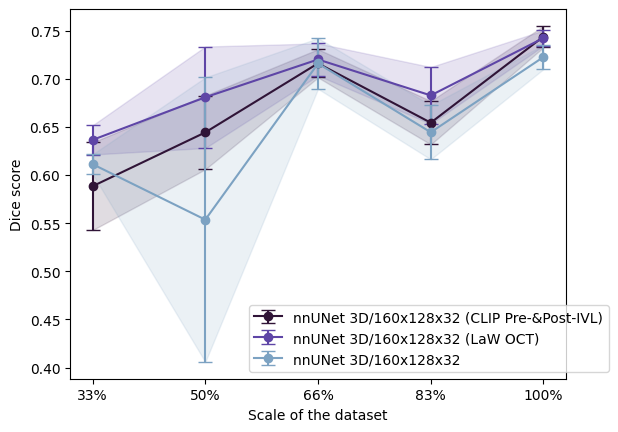

In [12]:
fig, ax = plt.subplots()

colors = [cmap(i) for i in range(0, 255, 255//len(avg_scale_analyse))]
alpha = 0.15

for i in range(len(avg_scale_analyse)):
    ax.errorbar(avg_scale_analyse.columns, avg_scale_analyse.iloc[i, :], yerr=std_scale_analyse.iloc[i, :], label=avg_scale_analyse.iloc[i, :].name, marker='o', capsize=5, color=colors[i])
    ax.fill_between(avg_scale_analyse.columns, avg_scale_analyse.iloc[i, :] - std_scale_analyse.iloc[i, :], avg_scale_analyse.iloc[i, :] + std_scale_analyse.iloc[i, :], alpha=alpha, color=colors[i])

# # ax.plot(avg_scale_analyse.columns, avg_scale_analyse.iloc[1, :], label=avg_scale_analyse.iloc[1, :].name, marker='o')
# ax.errorbar(avg_scale_analyse.columns, avg_scale_analyse.iloc[1, :], yerr=std_scale_analyse.iloc[1, :], label=avg_scale_analyse.iloc[1, :].name, marker='o', capsize=5, color=colors[1])
# ax.fill_between(avg_scale_analyse.columns, avg_scale_analyse.iloc[1, :] - std_scale_analyse.iloc[1, :], avg_scale_analyse.iloc[1, :] + std_scale_analyse.iloc[1, :], alpha=alpha, color=colors[1])

# # ax.plot(avg_scale_analyse.columns, avg_scale_analyse.iloc[2, :], label=avg_scale_analyse.iloc[2, :].name, marker='o')
# ax.errorbar(avg_scale_analyse.columns, avg_scale_analyse.iloc[2, :], yerr=std_scale_analyse.iloc[2, :], label=avg_scale_analyse.iloc[2, :].name, marker='o', capsize=5, color=colors[2])
# ax.fill_between(avg_scale_analyse.columns, avg_scale_analyse.iloc[2, :] - std_scale_analyse.iloc[2, :], avg_scale_analyse.iloc[2, :] + std_scale_analyse.iloc[2, :], alpha=alpha, color=colors[2])

ax.set_xlabel('Scale of the dataset')
ax.set_ylabel('Dice score')

ax.legend(loc='lower right', bbox_to_anchor=(1.1, 0))

fig.savefig('discussion_scale_analysis.png', dpi=1000, bbox_inches='tight')
plt.show()